# Introduction to Statistics

Gerard Tromp, Prof Bioinformatics, FMHS Stellenbosch

2018-02-26

## Random variables

A random variable **X** is: **the numerical outcome of a random experiment**  

Coin toss:  

| outcome | TT | HT or TT | HH |  
|----|----|:-----:|-----|  
| x | 0 | 1 | 2 |  

Probabilities:   

| x | 0 | 1 | 2 |  
|----|----|:-----:|-----|  
| P(X=x) | 0.25 | 0.5 | 0.25 |  



## Density histogram of coin toss

Instead of frequency, we plot the *relative frequency* at  
- value of outcome
  
<p>  
<p>  
Generically these are called:    
- Called a density histogram (**discrete** values)  
    -- Probability histogram
- Probability density plot (**continuous** values)

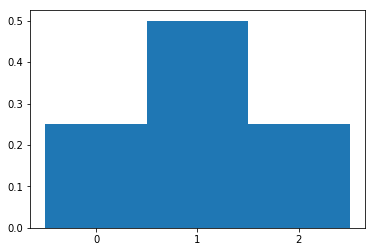

In [2]:
import matplotlib.pyplot as plt
import numpy as np

a = [0,1,1,2]
fig,ax = plt.subplots()
plt.xticks((0.5,1.5,2.5))
ax.set_xticklabels((0,1,2))
plt.hist(a,bins=(0,1,2,3),density=True) 
plt.show()


## Density histogram of coin toss

Area under the curve (AUC) is **1**  
- 0.25 + 0.5 + 0.25 

This will be true for all other distributions used in statistics. 
  
<p>  
<p>  
A probability density function (PDF)  
- Generates the values for a density plot  



## Probability (density) histogram for student weight

We can convert the student weight histogram to a probability histogram  
We divide each bin (column height) by the total number of observations (n)  

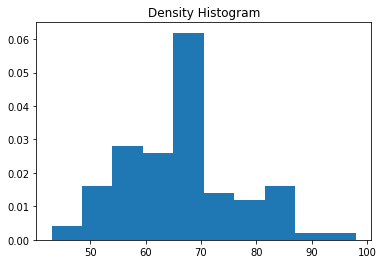

In [3]:
import pandas
weights = pandas.read_csv("static/Data/StudentWeights.csv")

fig, ax = plt.subplots()
a=plt.hist(weights['Weight'], bins=10, density=True)  # arguments are passed to np.histogram
plt.title("Density Histogram")
plt.show()

#### We notice an error in the "density" plot

For some reason the density cannot possibly sum to 1   
  
<p>
The greatest "density" is about 0.06  
- 10 bins * max(density) <= 0.6

In [91]:
print(a[0])
print("\nThe sum of the \"densities\" is: %8.6f\n" % (sum(a[0])) )
a=list(a)
a[0] = a[0]/sum(a[0])
print(a[0])
print("\nNow the sum is: %8.6f" %(sum(a[0])) )


[0.003996   0.01598402 0.02797203 0.02597403 0.06193806 0.01398601
 0.01198801 0.01598402 0.001998   0.001998  ]

The sum of the "densities" is: 0.181818

[0.02197802 0.08791209 0.15384615 0.14285714 0.34065934 0.07692308
 0.06593407 0.08791209 0.01098901 0.01098901]

Now the sum is: 1.000000


#### Density histogram using matplotlib

We have fixed the problem in the standard implementation  

Now we need to plot the histogram  
-  Cannot use the original object  
  - tuple with one list of "densities"  
  - another list with begin **and** end-points on x-axis  
  - x list is one longer than y list
  
Need to convert to two lists of equal length  

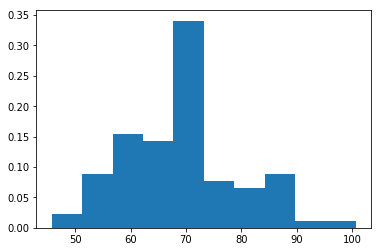

In [92]:
x=a[1]
x1=x[:-1] # slice to remove last element
x2=x[1:]  # slice to remove first element
x=x1+(x2-x1)
plt.bar(x=x,height=a[0], align='center', width=(x2-x1))
plt.show()

## Mean of a random variable

Recall definition of mean:  
$$ \bar x = \frac{1}{n}\sum\limits_{i=1}{n} x_i $$

We can redefine as:  
$$ \bar x = \frac{1}{n} \sum\limits_{\forall\enspace x}{} n_xx $$  

Which reduces to:  
$$ \bar x = \sum_{\forall\enspace x} x\frac{n_x}{n} $$


## Mean of a random variable
  
But:  
-  $ \frac{n_x}{x} $ is the relative frequency
- relative frequency is p(x)  

Therefore we can define:  
- The **mean of the probability distribution** as:  

$$ \mu = \sum_{\forall\enspace x} x\cdot p(x)$$  
Also called the **expected value** of x: E[X]  



## Var and SD of a random variable

In a similar way, we can define the **variance** as:

$$ \sigma^2 =\sum_{\forall\enspace x} (x-\mu)^2p(x) $$  

And the **standard deviation** as:

$$ \sigma = \sqrt{\sum_{\forall\enspace x} (x-\mu)^2p(x)} $$

## Continuous variables

Up to now, we have worked with **discrete** variables  
- Finite number *or* countable outcomes  

For **continous variables**  
- Infinite outcomes  
- therefore, **p(x) = 0**  



## Continuous variables

Have to define outcomes between limits  
Let:  
- f(x) = 0 when x < 0  
- f(x) = 0 when x > 1  
- f(x) = 1 when 0 <= x <= 1  

<p>  
<p>  
Probability of an event between a and b:
- if  
  - 0 <= a <= 1  
  - 0 <= b <= 1  
  - a < b   
- area under the curve between a **and** b  


## Continuous variables

This translates to an integral (calculus):

$$ p(x|a,b)  = \int_{a}^{b} f(x)\cdot dx $$

## Mean and variance of continuous variables

Mean:  
$$ \mu = \int_{-\infty}^{\infty} x\cdot f(x)\cdot dx $$  

Variance:  
$$ \sigma^2 = \int_{-\infty}^{\infty} (x-\mu)^2\cdot f(x)\cdot dx $$  

In [105]:
import matplotlib.mlab as mlab
import math
from scipy.stats.kde import gaussian_kde

x = np.random.normal(0,1,10000) # generate some random normally distributed data
kde = gaussian_kde( x ) ## Generate Gaussian kernel density
dist_space = np.linspace( min(x), max(x), 200 )

mu, variance = (0,1)
sigma = math.sqrt(variance)
x = np.linspace(mu - 5*sigma, mu + 5*sigma, 100)

<bound method Figure.show of <matplotlib.figure.Figure object at 0x18751F70>>

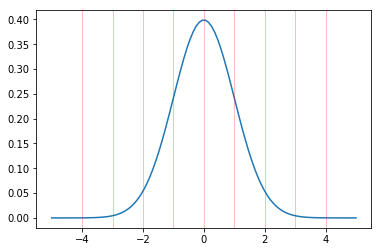

In [106]:
plt.plot(x,mlab.normpdf(x, mu, sigma)) # Make density plot of mathematical Normal
sigmaMultiples=[-4,-3,-2,-1,0,1,2,3,4]
for xc in sigmaMultiples:
    plt.axvline(x=xc, lw=0.5, alpha=0.5, color='red' )
fig.show

## The Standard Normal Distribution

- Standard Normal (prior figure)  
  - &mu; = 0
  - &sigma; = 1  
  
<p>

- For a distribution with properties   
  - mound-shaped  (more data in the middle)
  - unimodal  
  - symmetrical  
 
- Z transformation generates a Standard Normal  
    

In [12]:
from scipy.stats import norm   # import normal dist.

# mean and standard deviation
mu,sigma = 0,1  

# normal_dist(mu,sigma)
anorm = norm(loc=mu, scale=sigma)
factors = [1,2,3,4]            # multiple of sigma
alphas = [0.18, 0.11, 0.08]  # level of alpha

# plot full normal curve
segs = 1000
x = np.linspace(anorm.ppf(0.00005), anorm.ppf(0.99995), segs)





/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  # Remove the CWD from sys.path while we load stuff.


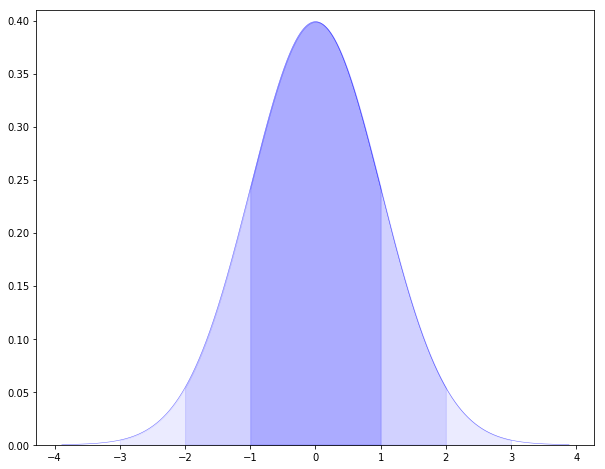

In [13]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(10,8)
ax.plot(x, anorm.pdf(x), 'b-', lw=0.5, alpha=0.6)

# plot color-filled portions
for fac, alp in zip(factors, alphas):
    # print(mu-fac*sigma, mu+fac*sigma, alp)
    lo = mu-fac*sigma
    hi = mu+fac*sigma
    xs = np.linspace(lo, hi, fac*segs/4)  # prep array of x's
    plt.fill_between(xs, anorm.pdf(xs), y2=0, where= xs >= lo , \
                     interpolate=False, \
                     color='blue', alpha=alp)

plt.ylim(0, 0.41)

plt.show()

![StandardNormal](static/Figures/StandardNormal.png)

## Standard Normal and other distributions

We can use **Statistical Distributions** to:  
- Compute probability  
- Compute confidence intervals  

Probability is the sum under the curve >= to the observation  
- depends on hypothesis (<,>,<>)  
- bidirectional from 0 for (<>) 
- proportion of AUC **not close** to &mu;

Confidence intervals are the complement to Probability  
- proportion of AUC **close** to &mu;
- 1 &minus; P

## Confidence intervals (CI)

For a distribution (mound-shaped, symmetrical):  
1. Compute the z<sub>i</sub>  
2. Compute the SD
3. Use the Standard Normal to calculate how many SD necessary to include the CI
   - Z<sub>&alpha;/2</sub>
4. Add SD &times; Z<sub>&alpha;/2</sub> &plusmn; to &mu;

# Exercises

1. Use StudentWieghts.csv to:  
  1. Find mean, median, mode, SD, IQR  
  2. Calculate the values needed to construct a box-and-whisker plot  
    1. All data
    2. Males and females separately
2. Copy dataset and **add** to the dataset  
  1. males with weights 50, 60, 110,120,130 
  2. females with weights 30, 40, 70, 80, 90
3. Repeat #1  

#  Exercises

4. Calculate the 95% confidence using the  
  - Standard Normal, and   
  - Student t distributions  
For all, males, females
  - with and without the outliers


#  Exercises

Using the Nightingale.csv data   

1. Construct a stacked histogram of cause of death